# 1 Intro to Computer Vision (CV)
Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs

Utilizes Deep learning and convolutional neural network (CNN).

A CNN helps a machine learning or deep learning model “look” by breaking images down into pixels that are given tags or labels.

Example CV tasks:
- Image classification
- Object detection
- Object tracking: This task is often executed with images captured in sequence or real-time video feeds. eg: autonomous vehicles
- Content-based image retrieval: browse, search and retrieve images from large data stores, based on the content of the images rather than metadata tags.



sources:
- https://www.ibm.com/topics/computer-vision
- https://datagen.tech/guides/computer-vision/algorithms/

# 2 Look at The Data

#### Using Gdrive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import os
os.chdir("../")

In [2]:
# per_df = pd.read_csv('/content/drive/MyDrive/presentations/week10/performance_data.csv')  # for Gdrive

per_df = pd.read_csv('data/challenge_data/performance_data.csv')  # for local
per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       905 non-null    object 
 1   preview_link  905 non-null    object 
 2   ER            905 non-null    float64
 3   CTR           905 non-null    float64
dtypes: float64(2), object(2)
memory usage: 28.4+ KB


In [3]:
per_df.head(5)

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


**Engagement Rate (ER)** - the number of engagements divided by the number of impressions

**Click Through Rate (CTR)** - the number of clicks divided by the number of engagements

**Video Through Rate (VTR)** - the number of videos ends divided by the number of engagements

In [4]:
per_df.loc[0].preview_link

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/bfbf7a2b7ac635e67877b1ab87fd6629/b7a604b3b08f0862ef0e/index.html'

# 3 Locating Assets within Creative

In [1]:
import cv2
from matplotlib import pyplot as plt
from typing import Tuple

def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: Tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)

{'eng_top_left_pos': (178, 750), 'eng_bottom_right_pos': (422, 849)}

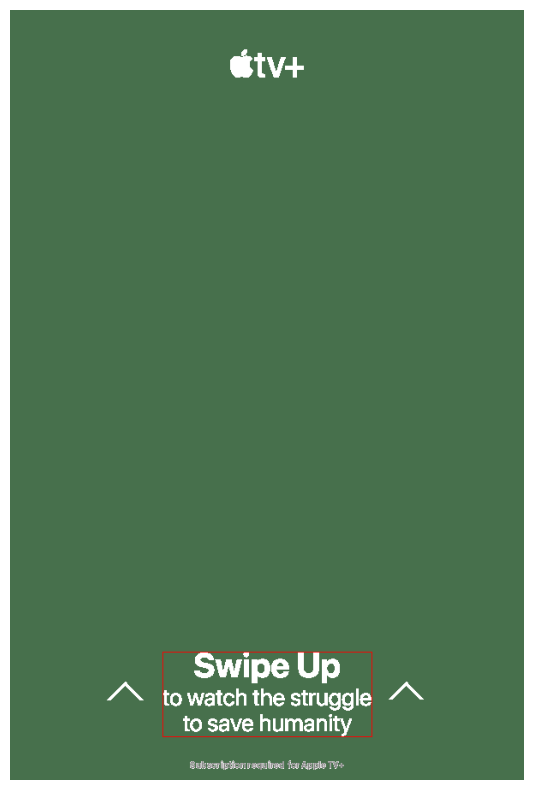

In [ ]:
# locate_image_on_image(
#     '/content/drive/MyDrive/presentations/week10/Assets/4c3bb41d4f40f39842b7b8d3f536366a/engagement_instruction.png', 
#     '/content/drive/MyDrive/presentations/week10/Assets/4c3bb41d4f40f39842b7b8d3f536366a/_preview.png', prefix='eng_', visualize=True)


{'eng_top_left_pos': (50, 114), 'eng_bottom_right_pos': (430, 177)}

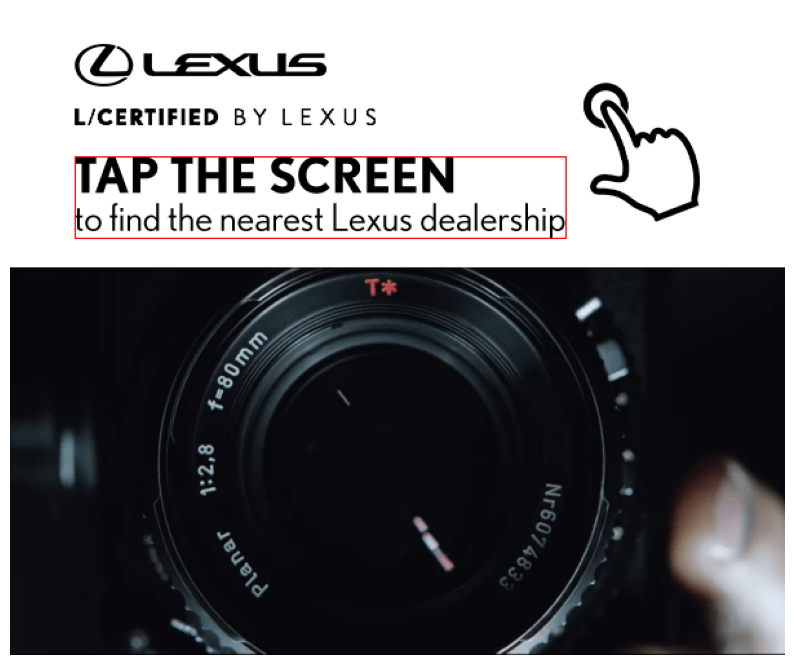

In [ ]:
locate_image_on_image(
    '/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/engagement_instruction.png', '/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/_preview.png', prefix='eng_', visualize=True)

{'eng_top_left_pos': (0, 0), 'eng_bottom_right_pos': (600, 900)}

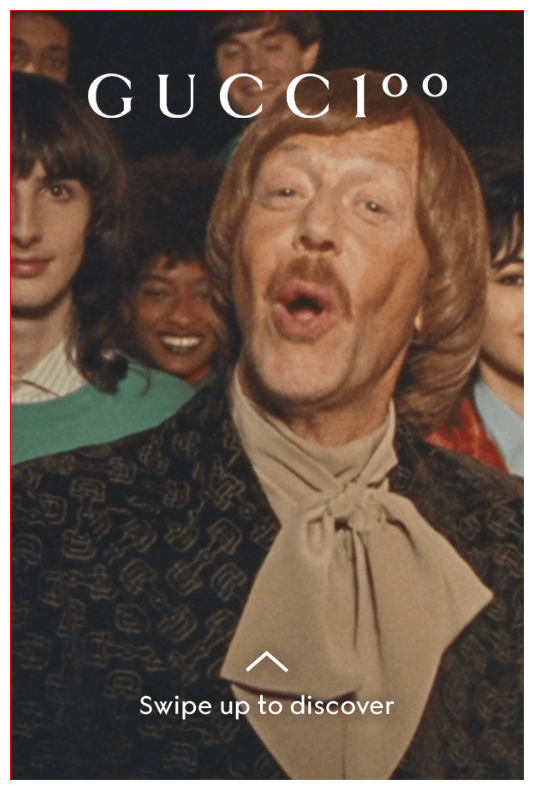

In [11]:
locate_image_on_image(
    'data/Assets/3d8be6f0a1e1c248a02befc0dd3f6bec/1logos.png', 
    'data/Assets/3d8be6f0a1e1c248a02befc0dd3f6bec/_preview.png', prefix='eng_', visualize=True)


{'eng_top_left_pos': (60, 185), 'eng_bottom_right_pos': (526, 262)}

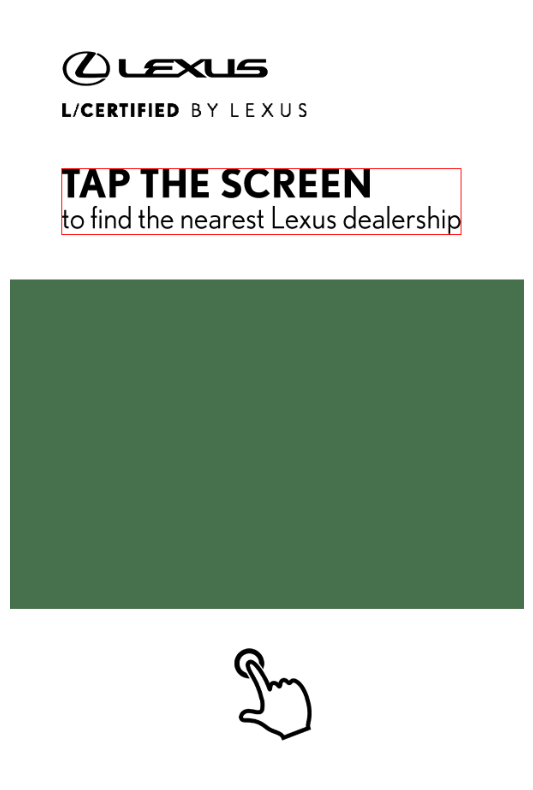

In [13]:
locate_image_on_image(
    'data/Assets/4f23f2bdbb2c99b8d63bba659d22fe79/engagement_instruction.png', 
    'data/Assets/4f23f2bdbb2c99b8d63bba659d22fe79/_preview.png', prefix='eng_', visualize=True)


> What features can be Extracted from Locating Assets ?
- Size
- Ratio
- Total Covered Area
- and more ...

# 4 Futher examples of CV

If you want to further enrich the data

## 4.1 Extracting Colors

In [ ]:
# !pip install extcolors
# !pip install colormap

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 714.8/714.8 kB 16.2 MB/s eta 0:00:00
  Created wheel for colormap: filename=colormap-1.0.6-py3-none-any.whl size=15824 sha256=1d6e406184d68a8a531e76c29a220f06b287057eca15b7586a90f2af5a8f55b7
  Stored in directory: /root/.cache/pip/wheels/ea/c2/2c/8799f753a6c0acef2a86a40c7c091fa70d0f49785f1f28fba1
Successfully built colormap


In [37]:
import extcolors
import pandas as pd
from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image

In [38]:
def identify_color_composition(image,
                               tolerance: int = 12,
                               limit: int = 2,
                               visualize: bool = False) -> None:
    """Function that identifies the color composition of a
    given image path."""

    extracted_colors = extcolors.extract_from_path(
        image, tolerance=tolerance, limit=limit)

    identified_colors = color_to_df(extracted_colors)

    if not visualize:
        return identified_colors

    list_color = list(identified_colors['c_code'])
    list_percent = [int(i) for i in list(identified_colors['occurrence'])]

    text_c = [c + ' ' + str(round(p*100/sum(list_percent), 1)) + '%' for c, p in zip(list_color,
                                                                                     list_percent)]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(100, 100), dpi=10)
    wedges, _ = ax[0].pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 60, 'color': 'black'}
                          )

    plt.setp(wedges, width=0.3)

    # create space in the center
    plt.setp(wedges, width=0.36)

    ax[0].set_aspect("equal")
    fig.set_facecolor('grey')

    ax[1].imshow(Image.open(image))

    plt.show()

    return identified_colors


def color_to_df(extracted_colors: tuple):
    """Converts RGB Color values from extcolors output to HEX Values."""

    colors_pre_list = str(extracted_colors).replace(
        '([(', '').replace(')],', '), (').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')', '')
                  for i in colors_pre_list]

    # convert RGB to HEX code
    df_rgb_values = [(int(i.split(", ")[0].replace("(", "")),
                      int(i.split(", ")[1]),
                      int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(", "")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")", ""))) for i in df_rgb]

    colors_df = pd.DataFrame(zip(df_color_up, df_rgb_values, df_percent),
                             columns=['c_code', 'rgb', 'occurrence'])

    return colors_df


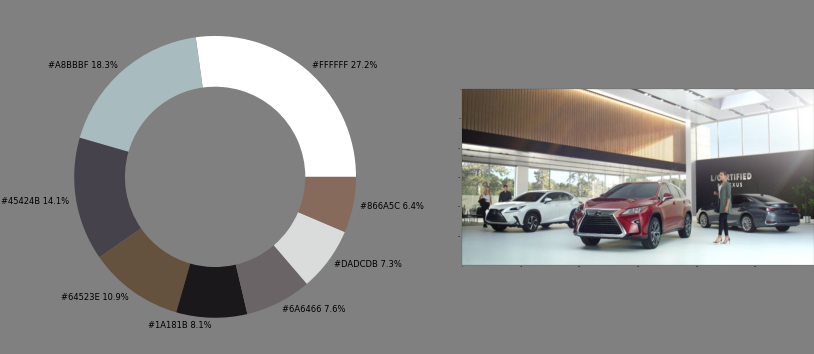

,c_code,rgb,occurrence
0,#FFFFFF,"(255, 255, 255)",40541
1,#A8BBBF,"(168, 187, 191)",27323
2,#45424B,"(69, 66, 75)",21087
3,#64523E,"(100, 82, 62)",16217
4,#1A181B,"(26, 24, 27)",12113
5,#6A6466,"(106, 100, 102)",11333
6,#DADCDB,"(218, 220, 219)",10916
7,#866A5C,"(134, 106, 92)",9537


In [27]:
identify_color_composition('/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/landing_2.jpg',tolerance=12,limit=8, visualize=True)

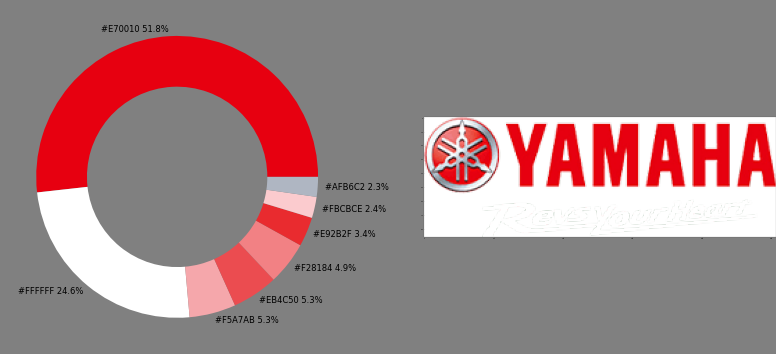

,c_code,rgb,occurrence
0,#E70010,"(231, 0, 16)",5122
1,#FFFFFF,"(255, 255, 255)",2439
2,#F5A7AB,"(245, 167, 171)",527
3,#EB4C50,"(235, 76, 80)",521
4,#F28184,"(242, 129, 132)",488
5,#E92B2F,"(233, 43, 47)",333
6,#FBCBCE,"(251, 203, 206)",240
7,#AFB6C2,"(175, 182, 194)",225


In [17]:
identify_color_composition('data/Assets/5b4d2cc82bf11b1fa80b366fdd7a5867/f3-logo.png',tolerance=12,limit=8, visualize=True)

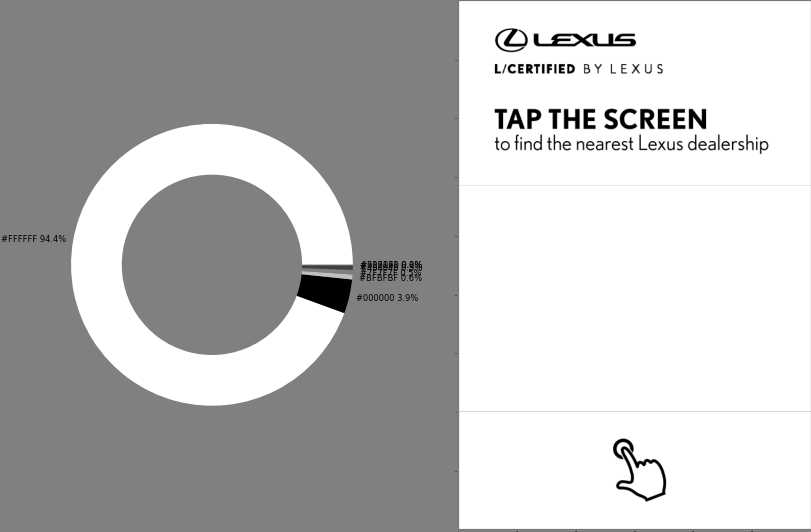

,c_code,rgb,occurrence
0,#FFFFFF,"(255, 255, 255)",291794
1,#000000,"(0, 0, 0)",12072
2,#BFBFBF,"(191, 191, 191)",1749
3,#7F7F7F,"(127, 127, 127)",1576
4,#404040,"(64, 64, 64)",1545
5,#606060,"(96, 96, 96)",178
6,#212121,"(33, 33, 33)",86


In [18]:
identify_color_composition('data/Assets/3ae630f06b5d395a7a0db157c2430093/_preview.png',tolerance=12,limit=8, visualize=True)

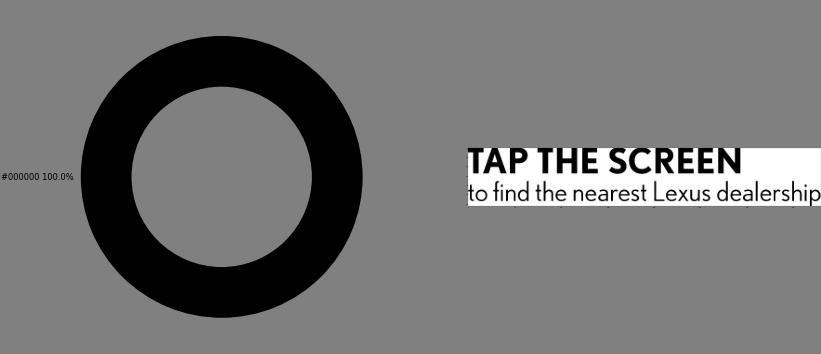

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",7175


In [21]:
identify_color_composition('data/Assets/5a48ffcbf611f167ecbb884e807f31f6/engagement_instruction.png',tolerance=12,limit=8, visualize=True)

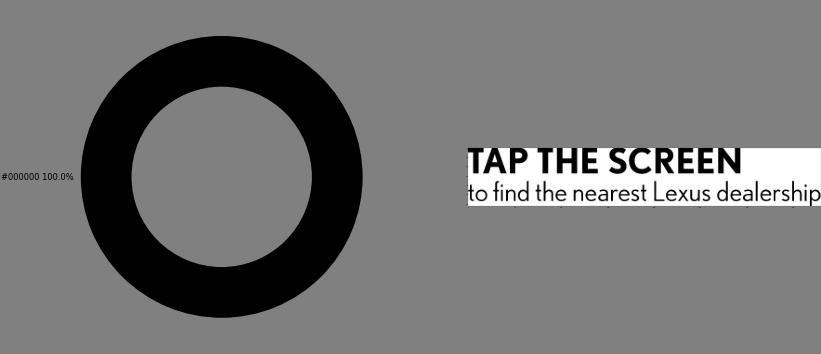

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",7175


In [ ]:
identify_color_composition(
    '/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/engagement_instruction.png', visualize=True)

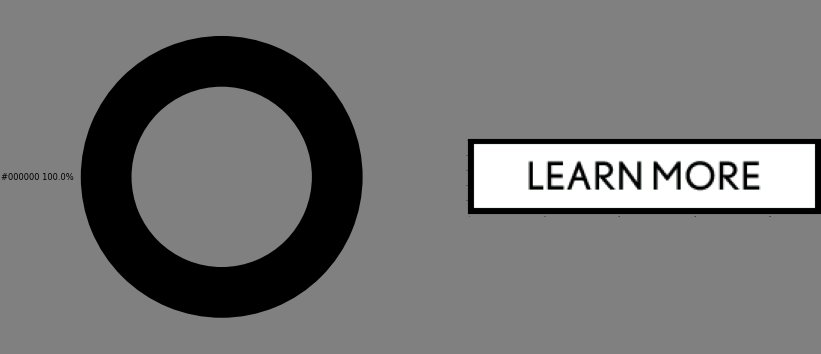

,c_code,rgb,occurrence
0,#000000,"(0, 0, 0)",3577


In [ ]:
identify_color_composition(
    '/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/cta.png', limit=3 ,visualize=True)

> What features can be Extracted from Color ?
- Number of Colors used
- Background Color
- Text Color
- Contrast, Saturation, ...
- and more ...

## 4.2 Object Detection with YOLO

YOLO (You Only Look Once) is a CV object detection algorithm.

YOLO was designed to efficiently and simultaneously perform object detection and classification in real-time on a single pass through an image

In [22]:
import torch

In [23]:
%cd yolov7
! python detect.py --weights yolov7-tiny.pt --conf 0.4 --img-size 1280 --source /content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/_preview.png --project trial --name run
%cd ..

[Errno 2] No such file or directory: 'yolov7'
/home/hillary_kipkemoi/Automated-Storyboard-Synthesis-Digital-Advertising/notebooks
python: can't open file 'detect.py': [Errno 2] No such file or directory
/home/hillary_kipkemoi


#### Using YOLO - The newer version yolov8

In [1]:
from ultralytics import YOLO

##### YOLOv8 is a group of neural network models. 
##### These models were created and trained using PyTorch and exported to files with the .pt extension.
#### Refer here: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/

In [2]:
model = YOLO("yolov8m.pt") # Load the middle-sized model(m)

100%|██████████| 49.7M/49.7M [00:00<00:00, 530MB/s]


#### Prediction example with YOLOv8

In [17]:

results = model.predict("data/cat_dog.jpg")

100%|██████████| 131M/131M [00:00<00:00, 494MB/s] 



image 1/1 /home/hillary_kipkemoi/Automated-Storyboard-Synthesis-Digital-Advertising/data/cat_dog.jpg: 448x640 1 cat, 1 dog, 3145.6ms
Speed: 3.3ms preprocess, 3145.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [20]:
modelx = YOLO("yolov8x.pt") # Load the Huge model(x)
res = modelx.predict("data/Assets/0a22f881b77f00220f2034c21a18b854/rev-thumbnail-mpu.jpg")

image 1/1 /home/hillary_kipkemoi/Automated-Storyboard-Synthesis-Digital-Advertising/data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png: 544x640 1 clock, 3827.0ms
Speed: 4.0ms preprocess, 3827.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


In [24]:
modelcl = YOLO("yolov8x-cls.pt	") # Load the Huge model(x)
res = modelcl.predict("data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png")


image 1/1 /home/hillary_kipkemoi/Automated-Storyboard-Synthesis-Digital-Advertising/data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png: 224x224 reflex_camera 0.77, lens_cap 0.21, Polaroid_camera 0.01, projector 0.00, CD_player 0.00, 369.9ms
Speed: 4.0ms preprocess, 369.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


##### YOLOv8 contains PyTorch models. The outputs from the PyTorch models are encoded as an array of PyTorch Tensor objects, so you need to extract the first item from each of these arrays:

In [8]:
result = results[0]
len(result.boxes)
box = result.boxes[0]
print("Object type", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf) #  the confidence level of the model about this object. If it's very low, like < 0.5, then you can just ignore the box.

Object type tensor([16.])
Coordinates: tensor([[261.0996,  94.0881, 460.9550, 313.6855]])
Probability: tensor([0.9450])


#### Above we see data as Tensor objects. To unpack actual values from Tensor, you need to use the .tolist() method for tensors with array inside, as well as the .item() method for tensors with scalar values.

In [9]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 16.0
Coordinates: [261.099609375, 94.08810424804688, 460.95501708984375, 313.6855163574219]
Probability: 0.9449876546859741


#####  YOLOv8 result object contains the convenient names property to get these classes:

In [10]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

##### This dictionary has everything that this model can detect. Now you can find that 16 is "dog", so this bounding box is the bounding box for detected DOG.

> What features can be Extracted from Object Detection ?
- Object Detected
- Number of Objects Detected
- and more ...

## 4.3 Extracting Text

In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

In [25]:
import pytesseract
import cv2
import numpy as np
from typing import List, Tuple

In [26]:
def convert_hex_to_rgb(hex_color: str, normalize: bool = True) -> List[str]:
    """Converts a HEX color to a RGB color

    Args:
        hex_color (str): HEX color code to convert
        normalize (bool, optional): Choice to normalize calculated rgb values . Defaults to True.

    Returns:
        List[str]: List of RGB values in order, normalized or not.
    """
    colors = hex_color[1:]

    # Convert HEX color values to RGB Values
    colors = [int(colors[0:2], base=16),  # RED
              int(colors[2:4], base=16),  # GREEN
              int(colors[4:6], base=16)]  # BLUE

    # Normalize RGB values
    if normalize:
        colors = [color / 255 for color in colors]

    return colors

def get_luminance(hex_color: str) -> float:
    """Calculates the luminance of a given HEX color

    Args:
        hex_color (str): HEX color code to calculate luminance for

    Returns:
        float: luminance value of color
    """
    colors = convert_hex_to_rgb(hex_color)

    luminance = colors[0] * 0.2126 + colors[1] * 0.7152 + colors[2] * 0.0722

    return luminance

def fix_image_background(image_path: str):
    identified_colors = identify_color_composition(image_path)
    text_color = identified_colors['c_code'].to_list()[0]
    text_color_rgb = identified_colors['rgb'].to_list()[0]
    luminance = get_luminance(hex_color=text_color)

    if luminance < 140:
        background_color = (255, 255, 255)
    else:
        background_color = (0, 0, 0)

    # Load image
    image = cv2.imread(image_path)

    # Make all perfectly green pixels white
    image[np.all(image != text_color_rgb, axis=-1)] = background_color

    return image

def extract_text(image_path, tesseract_cmd: str = '', fix_background: bool = False):
    # pytesseract.pytesseract.tesseract_cmd = tesseract_cmd
    try:
        if fix_background:
            text = pytesseract.image_to_string(
                fix_image_background(image_path))
        else:
            text = pytesseract.image_to_string(image_path)

        return text

    except pytesseract.TesseractNotFoundError:
        raise Exception(
            f'Failure: Tesseract is not installed or not available in the defined path {tesseract_cmd}')

In [34]:
extract_text('/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/_preview.png')

'Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN\n\nto find the nearest Lexus dealership\n\n \n\x0c'

In [35]:
extract_text('/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/engagement_instruction.png', fix_background=True)

'TAP THE SCREEN\n\nto find the nearest Lexus dealership\n\x0c'

In [ ]:
extract_text('/content/drive/MyDrive/presentations/week10/Assets/5a48ffcbf611f167ecbb884e807f31f6/cta.png', fix_background=True)

'LEARN MORE\n'

##### Using local images

In [44]:
extract_text('data/Assets/3c99774ddf5babcf91ae21f76e9f4508/end-background.jpg')

'Maar Nae SAWN\n\nen\n\n \n\x0c'

> What features can be Extracted from Text ?
- Number of Characters
- Number of Words
- ...

# 5 Extra: How the Archive data was created


#### Extracting Start Frame and End Frame or Preview Video of a Creative

> We can use Selenium to Load the creative on a automated browser follow its progression and capture screenshots at certain moments or Record the entire creative.

In [49]:
# Imports
from typing import Tuple
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from os import path
from subprocess import Popen, call
import pyautogui
import ffmpeg # library used for audio & videw processing and gerneration

In [76]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from subprocess import Popen, call
from os import path, system
import platform
import subprocess
import os

def setup_geckodriver(version='0.34.0', geckodriver_path='./geckodriver'):
    if not os.path.exists(geckodriver_path):
        platform_architecture = platform.machine()
        if platform_architecture == 'aarch64':
            geckofile_type = 'linux-aarch64'
        elif platform_architecture == 'x86_64':
            geckofile_type = 'linux64'
        else:
            raise ValueError(f'Unsupported architecture: {platform_architecture}')

        geckodriver_tar_file_url = f'https://github.com/mozilla/geckodriver/releases/download/v{version}/geckodriver-v{version}-{geckofile_type}.tar.gz'
        geckodriver_tar_file_path = f'./geckodriver-v{version}-{geckofile_type}.tar.gz'

        subprocess.run(['wget', '-q', geckodriver_tar_file_url, '-O', geckodriver_tar_file_path])
        subprocess.run(['tar', '-xzf', geckodriver_tar_file_path, '-C', os.path.dirname(geckodriver_path)])
        os.remove(geckodriver_tar_file_path)
        subprocess.run(['chmod', '+x', geckodriver_path])

class CreativeFrameExtractor:
    def __init__(self, preview_url: str, engagement_type: str, save_location: str = '', browser_edges: Tuple[float, float] = (70, 1039), browser_type: str = 'firefox') -> None:
        self.preview_url = preview_url
        self.engagement_type = engagement_type
        self.browser_edges = browser_edges
        self.file_name = '-'.join(preview_url.split('/')[-3:-1])
        self.save_location = save_location
        self.video_name = path.join(self.save_location, self.file_name)
        # Split the command into a list of arguments
        self.cmd = ["ffmpeg", "-f", "gdigrab", "-draw_mouse", "0", "-framerate", "60", "-i", "desktop", "-vcodec", "libx264rgb", f"{self.video_name}.mkv", "-y"]
  
        self.browser_type = browser_type.lower()

        if self.browser_type == 'chrome':
            self.opt = ChromeOptions()
        elif self.browser_type == 'firefox':
            self.opt = FirefoxOptions()
            self.opt.add_argument("--headless")

        self.opt.add_argument("--hide-scrollbars")
        if self.browser_type == 'chrome':
            self.opt.add_experimental_option("excludeSwitches", ["enable-automation"])
            self.opt.add_argument("--disable-gpu")
            self.opt.add_argument("--no-sandbox")
            self.opt.set_capability("goog:loggingPrefs", {"browser": "ALL"})

        if self.browser_type == 'firefox':
            setup_geckodriver()

    def is_status_complete(self, passed_driver) -> bool:
        logs = passed_driver.get_log("browser")
        for log in logs:
            if log["source"] == "console-api":
                message = log["message"]
                if '"GAME CREATED"' in message or '"DROPPED"' in message:
                    print("Starting Recording AD-UNIT...")
                    print(log)
                    return False
                if '"START"' in message:
                    print("AD-UNIT Engaged...")
                    print(log)
                    return False
                if '"GAME COMPLETE"' in message:
                    print("Stopped Recording AD-UNIT...")
                    print(log)
                    return True
        return False

    @staticmethod
    def terminate(process: Popen) -> None:
        if process.poll() is None:
            call("taskkill /F /T /PID " + str(process.pid))

    @staticmethod
    def crop_video(filename: str, x_pos: float = 0, y_pos: float = 70, width: float = 650, height: float = 970) -> None:
        print(filename)
        input_video = ffmpeg.input(f"{filename}.mkv")
        cropped_video = ffmpeg.crop(input_video, x_pos, y_pos, width, height)
        output_video = ffmpeg.output(cropped_video, f"{filename}_cropped.mkv")
        ffmpeg.run(output_video)

    def _imitate_engagement(self, ad_size: Tuple[float, float]) -> None:
        center = (ad_size[0]/2, self.browser_edges[0] + (ad_size[1]/2))
        # Engagement actions...

    def generate_preview_video(self) -> None:
        if self.browser_type == 'chrome':
            service = ChromeService(executable_path='/usr/bin/chromedriver')
            driver = webdriver.Chrome(service=service, options=self.opt)
        elif self.browser_type == 'firefox':
            service = FirefoxService(executable_path='./geckodriver')
            driver = webdriver.Firefox(service=service, options=self.opt)
        driver.maximize_window()
        # The rest 
        try:
            driver.get(self.preview_url)
            canvas = driver.find_element(By.TAG_NAME, "canvas")
            video_recording = Popen(self.cmd)
            ad_size = (canvas.size.get("width"), canvas.size.get("height"))
            self._imitate_engagement(ad_size)
            WebDriverWait(driver, 100).until(self.is_status_complete)
            sleep(5)
            self.terminate(video_recording)
            driver.close()
            self.crop_video(self.video_name, x_pos=0, y_pos=70, width=ad_size[0], height=ad_size[1])
        except (TimeoutException, NoSuchElementException):
            driver.close()

    def generate_frames(self) -> None:
        if self.browser_type == 'chrome':
            service = ChromeService(executable_path='/usr/bin/chromedriver')
            driver = webdriver.Chrome(service=service, options=self.opt)
        elif self.browser_type == 'firefox':
            service = FirefoxService(executable_path='./geckodriver')
            driver = webdriver.Firefox(service=service, options=self.opt)
        driver.maximize_window()
        try:
            driver.get(self.preview_url)
            canvas = driver.find_element(By.TAG_NAME, "canvas")
            canvas.screenshot(path.join(self.save_location, f'{self.file_name}_start_frame.png'))
            print('Start Frame captured')
            ad_size = (canvas.size.get("width"), canvas.size.get("height"))
            self._imitate_engagement(ad_size)
            # Instead of using WebDriverWait with self.is_status_complete, use a different condition or a fixed sleep if applicable
            # For demonstration, replacing with a fixed sleep. Adjust according to your application's needs.
            sleep(5)  # Adjust the sleep time as necessary for your application
            canvas.screenshot(path.join(self.save_location,f'{self.file_name}_end_frame.png'))
            print('End Frame Captured')
        except (TimeoutException, NoSuchElementException):
            print("An error occurred while capturing frames.")
        finally:
            driver.close()

In [77]:
# Creating Extractor Object
ext = CreativeFrameExtractor(
    'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/5a48ffcbf611f167ecbb884e807f31f6/7e6dcb347f24c7843a8d/index.html', 'tap', save_location='./extracted_images/')

In [78]:
# Calling Generate Frames from Extractor Object
ext.generate_frames()

Start Frame captured
End Frame Captured


In [79]:
# Calling Generate Preview Video from Extractor Object
ext.generate_preview_video()

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/aarch64-linux-gnu --incdir=/usr/include/aarch64-linux-gnu --arch=arm64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis -

WebDriverException: Message: HTTP method not allowed
